In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv("Mall_Customers.csv")

In [5]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
x=dataset.iloc[:,[3,4]].values

In [9]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [11]:
from sklearn.cluster import DBSCAN
DB= DBSCAN(eps=2,min_samples=2).fit(x)
y_DB=DB.fit_predict(x)

In [13]:
y_DB

array([-1, -1,  0,  1, -1,  1,  0, -1, -1, -1,  2, -1,  2,  3,  2,  3, -1,
       -1, -1, -1, -1,  4, -1,  4, -1, -1,  5, -1,  5, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  6, -1,  6, -1, -1, -1, -1, -1,  7,  7, -1,
        8, -1,  8,  9, -1, -1,  9, 10,  9, 11, 11, 10, 12, 10, 12, 10, 10,
       12, 10, 13, -1, -1, 13, 14, 15, 15, 14, 15, 14, 15, 15, 14, 14, 15,
       14, -1, 16, -1, -1, 16, 17, 18, 17, 17, 18, 18, 18, 17, 18, 17, 18,
       -1, 18, 18, 17, 18, 18, 17, 18, 18, 18, 17, 18, 18, 18, 17, -1, 17,
       19, 19, -1, -1, -1, -1, -1, 20, -1, 21, 22, 21, 22, 20, -1, 23, -1,
       23, 24, -1, 24, 23, -1, -1, -1, -1, -1, -1, 25, 26, 27, 28, 27, 26,
       29, 28, 27, 30, 29, 30, 25, -1, -1, -1, -1, -1, 31, -1, -1, -1, -1,
       32, 31, -1, -1, 32, -1, 32, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [15]:
supervised=dataset

In [17]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [19]:
supervised["cluster_group"]=y_DB

In [21]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,-1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,-1
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


In [23]:
supervised.to_csv("cluster.csv",index=False)

C:\Anaconda3\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


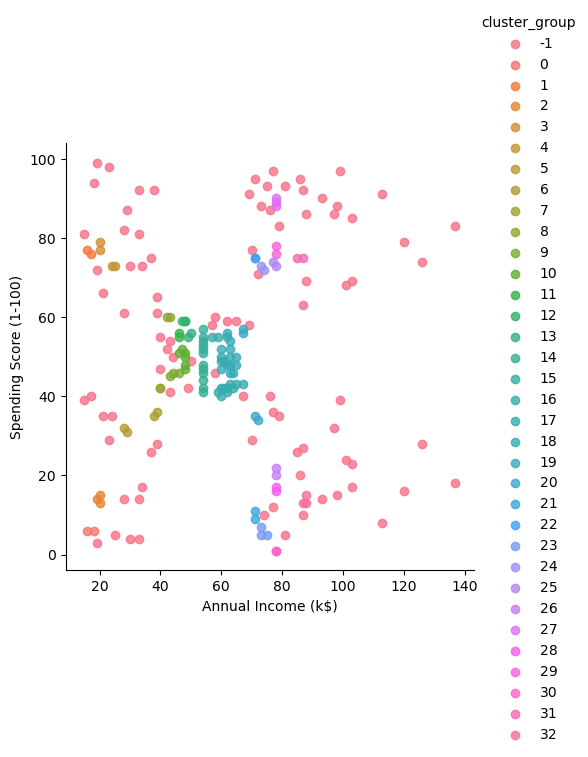

In [25]:
import seaborn as sns
facet=sns.lmplot(data=supervised,x=supervised.columns[3],y=supervised.columns[4],hue=supervised.columns[5],fit_reg=False,
                 legend=True,legend_out=True)